# Getting data

[Requests](https://requests.readthedocs.io/en/master/)

[BS4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)



In [1]:
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup

## API

The `response` object has a value to say if it succeded or failed in the HTTP request you made.

The response depends on the type of request, which depends on the website/API you are calling. The most popular request types are `GET`, `POST`, and `PUT` HTTP calls.

- The `GET` request sends a URL and receives data back

- The `POST` request sends a URL and data and receives data

- The `PUT` request sends data and updates what's happening on the server.

To create datasets the `GET` and `POST` will be most commonly used.

[Here is](https://github.com/public-apis/public-apis#science--math) a great list of API's to get free data.

<Response [200]>


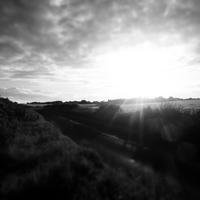

In [2]:
#  API that returns random image
r = requests.get('https://picsum.photos/200')
print(r)

from PIL import Image
from io import BytesIO

Image.open(BytesIO(r.content))

In [3]:
# Headers and JSON response
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5)'}
r = requests.get('https://api.chucknorris.io/jokes/random', headers=headers)
print(r)
# JSON .loads method is use to load string and .load is use to load files
json.loads(r.content)

<Response [200]>


{'categories': [],
 'created_at': '2020-01-05 13:42:21.455187',
 'icon_url': 'https://assets.chucknorris.host/img/avatar/chuck-norris.png',
 'id': 'eWw2YuMWRo2jA_O-pV5JnA',
 'updated_at': '2020-01-05 13:42:21.455187',
 'url': 'https://api.chucknorris.io/jokes/eWw2YuMWRo2jA_O-pV5JnA',
 'value': 'Chuck Norris can put out a fire....with gasoline.'}

In [4]:
# JSON to DataFrame
r = requests.get('https://data.colorado.gov/resource/tv8u-hswn.json?&county=Boulder')
if r.status_code == 200:
    j = json.loads(r.content)
    df = pd.DataFrame.from_dict(j)
df

,id,county,fipscode,year,age,malepopulation,femalepopulation,totalpopulation,datatype
0,33307,Boulder,13,1990,0,1597,1630,3227,Estimate
1,33308,Boulder,13,1990,1,1583,1581,3164,Estimate
2,33309,Boulder,13,1990,2,1593,1564,3157,Estimate
3,33310,Boulder,13,1990,3,1631,1530,3161,Estimate
4,33311,Boulder,13,1990,4,1696,1594,3290,Estimate
...,...,...,...,...,...,...,...,...,...
995,34302,Boulder,13,2000,85,141,301,442,Estimate
996,34303,Boulder,13,2000,86,115,294,409,Estimate
997,34304,Boulder,13,2000,87,113,238,351,Estimate
998,34305,Boulder,13,2000,88,96,211,307,Estimate


## Scrapping

In [5]:
url = 'https://www.basketball-reference.com/leagues/NBA_2020_per_game.html'
page = requests.get(url)
print(page)
soup = BeautifulSoup(page.content, 'html.parser')
# Printing first 500 caracters
#soup.prettify()[:500]
# Extracting HTML
table = soup.find_all(class_="full_table")

<Response [200]>


In [6]:
# Get html table headers
head = soup.find(class_="thead")
column_names_raw=[head.text for item in head][0]
# [2:-1] will skip the first and last \n
column_names_clean = column_names_raw.replace("\n",",").split(",")[2:-1]
print(column_names_clean)

['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


In [7]:
# Organize in a DataFrame

players = []
for i in range(len(table)):
    player_ = []
    for td in table[i].find_all("td"):
        player_.append(td.text)
    players.append(player_)

df = pd.DataFrame(players, columns = column_names_clean).set_index("Player")

#cleaning the player's name from occasional special characters
df.index = df.index.str.replace('*', '')
df

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,.592,0.0,...,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,.557,0.0,...,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,.493,1.2,...,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,.500,0.0,...,,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,.368,1.0,...,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,.437,3.4,...,.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,.524,0.3,...,.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,.250,0.0,...,,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0


## Example: IMDB

In [8]:
import re
import time
import random as ran

# Extract data from movie "cards"
def get_card_data(card):
    
    mdata = {}
  
    mdata['movie'] = card.find('h3',{'class': 'lister-item-header'}).find( 'a').get_text()    
    mdata['year'] = str(card.find('span',{'class': 'lister-item-year'}).contents[0][1:-1])
    mdata['imdb'] = float(card.find('div',{'class':'inline-block ratings-imdb-rating'}).get('data-value'))

    try:
        mdata['metascore'] = float(card.find('span',{'class':re.compile('metascore *')}).contents[0].strip())
    except:
        mdata['metascore'] = None

    mdata['votes'] = int(card.find('span',{'name':'nv'}).get('data-value'))

    try:
        mdata['us_grossMillions'] = round(float(card.find_all('span',{'name':'nv'})[1].get('data-value').replace(',',''))/1e6,2)
    except:
        mdata['us_grossMillions'] = None

    mdata['timeMin'] = int(card.find('span',{'class':'runtime'}).contents[0].replace(" min",""))

    return mdata

In [9]:
headers = {"Accept-Language": "en-US,en;q=0.5"}
PAGE_NUMBER = 1
rows = []

# Get Top 100 movies
while PAGE_NUMBER <= 100:
    url = f'https://www.imdb.com/search/title/?groups=top_1000&start={PAGE_NUMBER}&ref_=adv_nxt'
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, 'html.parser')
    cards = soup.find_all('div', {'class':'lister-item mode-advanced'})
    for card in cards:
        rows.append(get_card_data(card))
    PAGE_NUMBER += 50
    
    # Add random downtime between page loads
    time.sleep(ran.randint(0, 10))

In [10]:
df = pd.DataFrame(rows)
df

,movie,year,imdb,metascore,votes,us_grossMillions,timeMin
0,Soul,2020,8.1,83.0,177939,NaN,100
1,Avengers: Endgame,2019,8.4,78.0,818791,858.37,181
2,The Sound of Music,1965,8.0,63.0,207262,163.21,172
3,The Trial of the Chicago 7,2020,7.8,77.0,97388,NaN,129
4,Dara of Jasenovac,2020,8.7,NaN,52913,NaN,130
...,...,...,...,...,...,...,...
95,The Social Network,2010,7.7,95.0,627370,96.96,120
96,Watchmen,2009,7.6,56.0,501922,107.51,162
97,Saving Private Ryan,1998,8.6,91.0,1239994,216.54,169
98,Wonder,I) (2017,8.0,66.0,143166,132.42,113
